# Model Training

In [4]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Epoch 1/50


/Users/ankit/Projects/PUF/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.3585 - loss: 0.7539 - val_accuracy: 0.5098 - val_loss: 0.6954
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5002 - loss: 0.6818 - val_accuracy: 0.7059 - val_loss: 0.6356
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6598 - loss: 0.6379 - val_accuracy: 0.8431 - val_loss: 0.5836
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6626 - loss: 0.6008 - val_accuracy: 0.8235 - val_loss: 0.5348
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.6754 - loss: 0.5774 - val_accuracy: 0.7843 - val_loss: 0.4999
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.7266 - loss: 0.5471 - val_accuracy: 0.7843 - val_loss: 0.4721
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.7340 - loss: 0.4743 - val_accuracy: 0.8039 - val_loss: 0.4500
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7748 - loss: 0.4663 - val_accurac

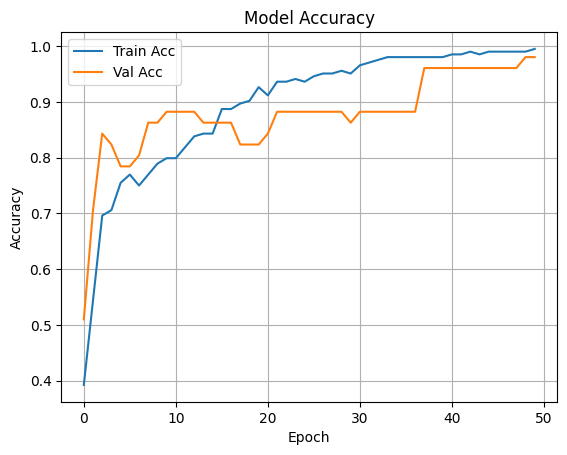

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9765 - loss: 0.1095 
Test Loss: 0.11395543813705444
Test Accuracy: 0.9803921580314636


In [8]:
n = 8
# Assuming your dataset is in a CSV file
# input = pd.read_csv(f"input_{n}.csv")
input = pd.read_csv(f"phi_{n}.csv")
output = pd.read_csv(f"output_{n}.csv")
# Separate features (input) and target (output) columns
x = pd.DataFrame(input)
y = pd.DataFrame(output)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=n, activation='tanh', input_dim=n))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50


/Users/ankit/Projects/PUF/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1049/1049 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.6718 - loss: 0.5992 - val_accuracy: 0.7338 - val_loss: 0.5274
Epoch 2/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7587 - loss: 0.4917 - val_accuracy: 0.8430 - val_loss: 0.3782
Epoch 3/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - accuracy: 0.8575 - loss: 0.3462 - val_accuracy: 0.8975 - val_loss: 0.2574
Epoch 4/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.9122 - loss: 0.2365 - val_accuracy: 0.9262 - val_loss: 0.1957
Epoch 5/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9343 - loss: 0.1847 - val_accuracy: 0.9465 - val_loss: 0.1568
Epoch 6/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9468 - loss: 0.1525 - val_accuracy: 0.9507 - val_loss: 0.1371
Epoch 7/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9544 - loss: 0.1308 - val_accuracy: 0.9564 - val_loss: 0.1189
Epoch 8/50
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.9590 - loss: 0.11

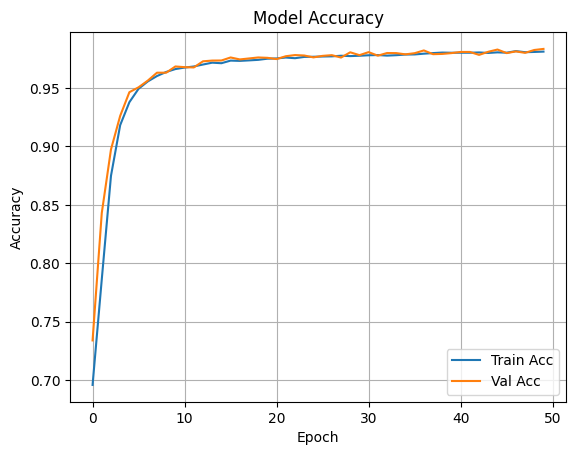

410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.9837 - loss: 0.0424
Test Loss: 0.04419708997011185
Test Accuracy: 0.9835965633392334


In [6]:
n = 16
# Assuming your dataset is in a CSV file
# input = pd.read_csv(f"input_{n}.csv")
input = pd.read_csv(f"phi_{n}.csv")
output = pd.read_csv(f"output_{n}.csv")
# Separate features (input) and target (output) columns
x = pd.DataFrame(input)
y = pd.DataFrame(output)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=n, activation='tanh', input_dim=n))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test))

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)